#Proyek Analisis Data: Bike Sharing Dataset

*   **Nama**: Tri Hadianto
*   **Email**: trihadianto15@gmail.com
*   **ID Dicoding**: mc459d5y0418





## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : pada jam berapa orang sering menyewa sepeda?
- Pertanyaan 2 : bagaimana pengaruh weathersit dan temp dalam penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
"""Mengambil data hour dari github"""

df_hour = pd.read_csv("https://raw.githubusercontent.com/trihadianto15/Bike_Sharing_Dataset/refs/heads/main/hour.csv", delimiter=",")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Kode diatas menampilkan 5 baris teratas dari data day dan hour
- kode diatas menggunakan file tipe csv untuk membaca file

### Assessing Data

#### Menilai Tabel df_hour

In [3]:
"""Melihat informasi data hour"""

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
"""Melihat missing value dari data hour"""

df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
"""Melihat duplicate data dari data hour"""

print("Jumlah Duplikasi : ", df_hour.duplicated().sum())

Jumlah Duplikasi :  0


In [6]:
"""Melihat Deskripsi data hour"""

df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Pada informasi data day kita bisa melihat tipe data "dteday" yaitu **object**, kita bisa mengubah tipe data tersebut menjadi datetime agar lebih sesuai
- Begitu juga pada informasi data hour tipe data "dteday" yaitu **object** dan kita bisa mengubah tipe data tersebut menjadi datetime sama seperti data day

### Cleaning Data

In [7]:
datetime_col  = ["dteday"]

for columns in datetime_col:
  df_hour[columns] = pd.to_datetime(df_hour[columns])

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight**
- dari hasil kode diatas menunjukan hasil "dteday" data df_hour dan df_day sudah berubah menjadi tipe datetime


## Exploratory Data Analysis (EDA)

### Explore...

In [9]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [10]:
"""Menampilkan data paling banyak penyewaan sepeda berdasarkan jam """

df_hour.groupby(by="hr").agg({
    "instant": "count",
    "casual": "sum",
    "registered": "sum",
    "cnt": "max",

}).sort_values(by="cnt", ascending=False)

,instant,casual,registered,cnt
hr,,,,
18,728,44496,265276,977
17,730,54220,282640,976
8,727,15761,245240,839
16,730,53834,173914,783
12,728,49718,134696,776
13,729,52713,132206,760
14,729,55089,120563,750
15,729,54606,128543,750
19,728,35505,191284,743


In [11]:
"""Menampilkan data penyewaan sepeda berdasarkan weathersit dan temp"""
df_hour.groupby(by=["weathersit", "temp"]).agg({
    "instant": "count",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

instant  casual  registered   cnt
weathersit temp                                   
1          0.02       15      16         691   707
           0.04       10      21         462   483
           0.06       14      30         509   539
           0.08       15      27         383   410
           0.10       46      75        2292  2367
...                  ...     ...         ...   ...
3          0.90        1      29         153   182
           0.92        2     122         370   492
4          0.14        1       1          22    23
           0.20        1       6         158   164
           0.22        1       1          35    36

[140 rows x 4 columns]

**Insight**
- kode diatas menampilkan data paling banyak orang menyewa sepeda pada mulai dari jam 18, 17, 8, dst
- kode kedua menampilkan pengaruh weathersit dan temp terhadap penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: pada jam berapa orang sering menyewa sepeda?

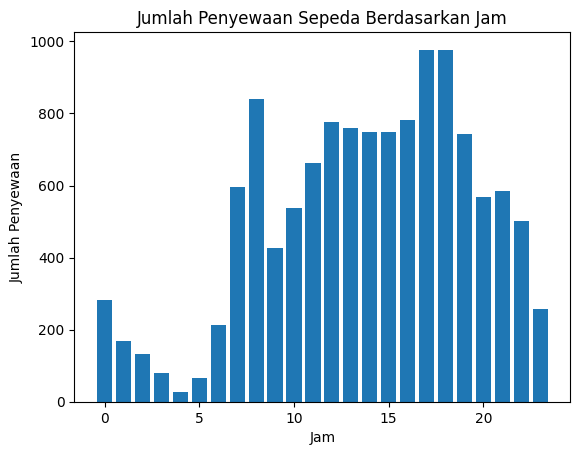

In [12]:
"""menampilkan grafik jumlah penyewaan sepeda berdasarkan jam"""

x = df_hour["hr"]

y = df_hour["cnt"]

plt.bar(x, y)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: bagaimana pengaruh weathersit dan temp dalam penyewaan sepeda?

<ipython-input-13-efb2bd4e264d>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weathersit 1")


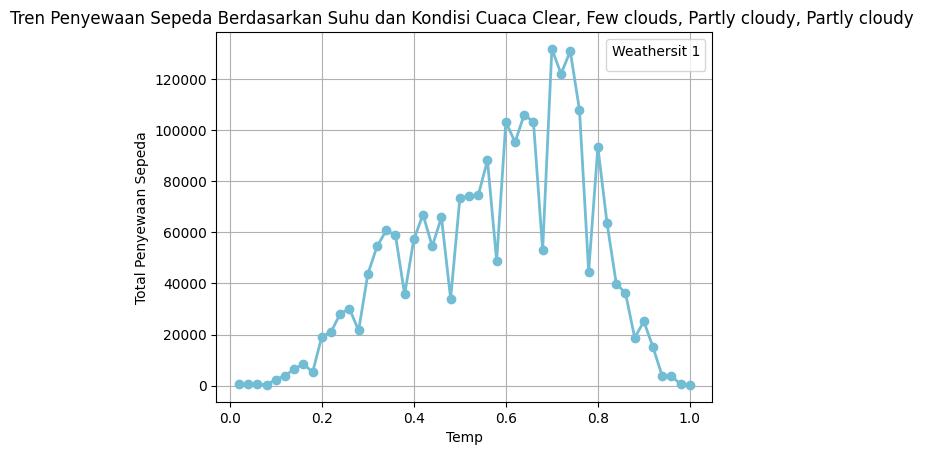

<ipython-input-13-efb2bd4e264d>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weathersit 2")


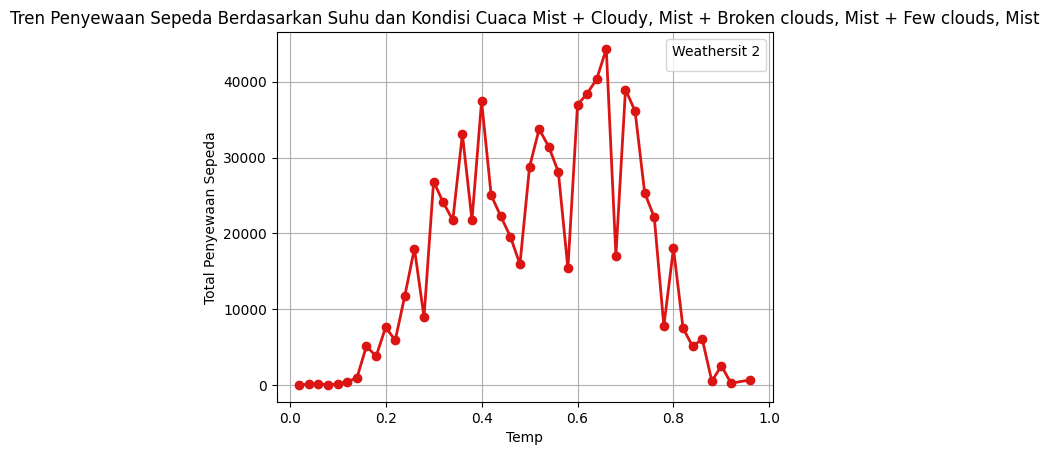

<ipython-input-13-efb2bd4e264d>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weathersit 3")


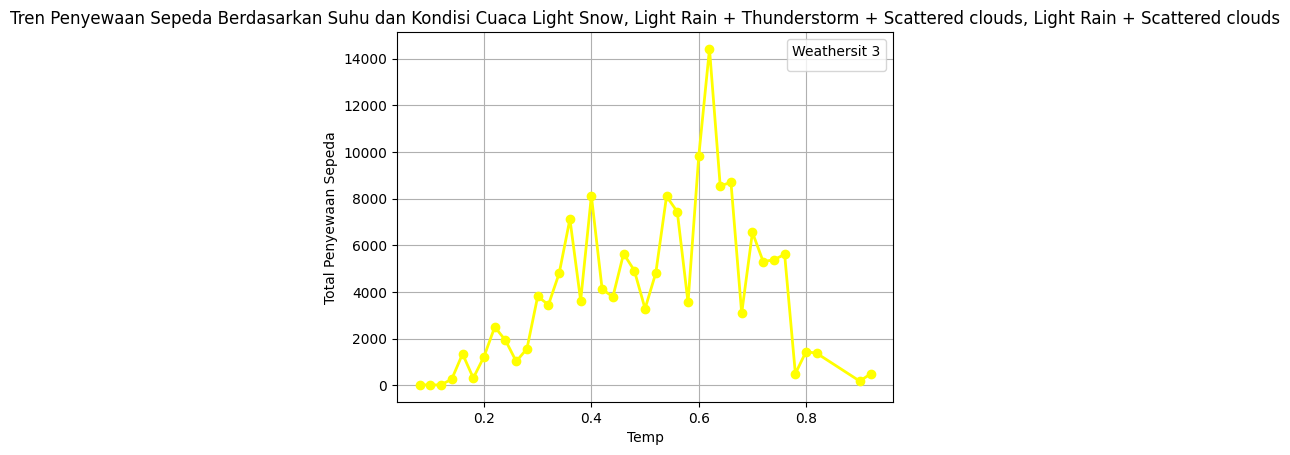

<ipython-input-13-efb2bd4e264d>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weathersit 4")


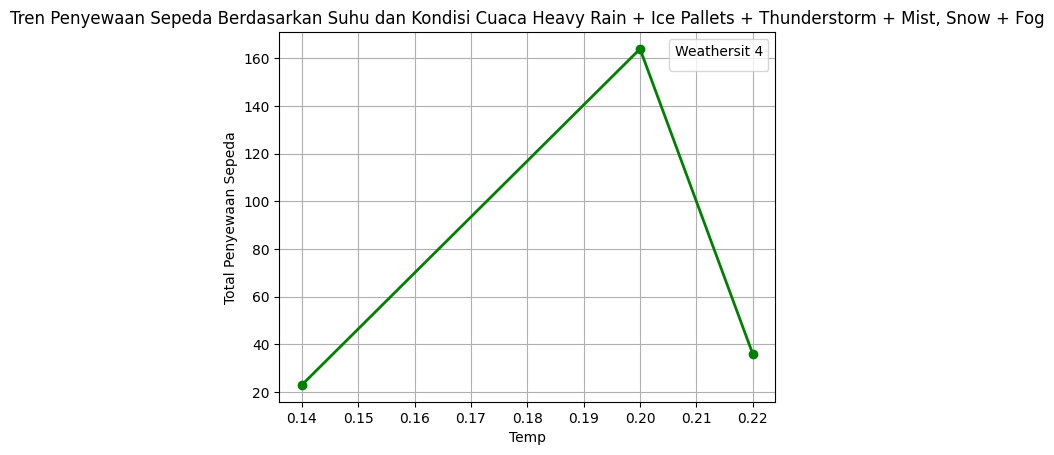

In [13]:
"""menampilkan grafik jumlah penyewaan sepeda berdasarkan kondisi cuaca dan suhu"""
weathersit_temp_df = df_hour.groupby(["weathersit", "temp"]).agg({
    "cnt": "sum" #untuk menjumlahkan banyak penyewaan sepeda
}).reset_index()



#data untuk masing masing data weathersit
set_1 = weathersit_temp_df[weathersit_temp_df["weathersit"] == 1] #1: Clear, Few clouds, Partly cloudy, Partly cloudy
set_2 = weathersit_temp_df[weathersit_temp_df["weathersit"] == 2] #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
set_3 = weathersit_temp_df[weathersit_temp_df["weathersit"] == 3] #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
set_4 = weathersit_temp_df[weathersit_temp_df["weathersit"] == 4] #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#Grafik untuk weathersit 1
plt.xlabel("Temp")
plt.ylabel("Total Penyewaan Sepeda")
plt.plot(set_1["temp"], set_1["cnt"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Tren Penyewaan Sepeda Berdasarkan Suhu dan Kondisi Cuaca Clear, Few clouds, Partly cloudy, Partly cloudy ")
plt.legend(title="Weathersit 1")
plt.grid()
plt.show()

#Grafik untuk weathersit 2
plt.xlabel("Temp")
plt.ylabel("Total Penyewaan Sepeda")
plt.plot(set_2["temp"], set_2["cnt"], marker="o", linewidth=2, color="#db1514")
plt.title("Tren Penyewaan Sepeda Berdasarkan Suhu dan Kondisi Cuaca Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")
plt.legend(title="Weathersit 2")
plt.grid()
plt.show()

#Grafik untuk weathersit 3
plt.xlabel("Temp")
plt.ylabel("Total Penyewaan Sepeda")
plt.plot(set_3["temp"], set_3["cnt"], marker="o", linewidth=2, color="#FFFF00")
plt.title("Tren Penyewaan Sepeda Berdasarkan Suhu dan Kondisi Cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")
plt.legend(title="Weathersit 3")
plt.grid()
plt.show()

#Grafik untuk weathersit 4
plt.xlabel("Temp")
plt.ylabel("Total Penyewaan Sepeda")
plt.plot(set_4["temp"], set_4["cnt"], marker="o", linewidth=2, color="#008000")
plt.title("Tren Penyewaan Sepeda Berdasarkan Suhu dan Kondisi Cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")
plt.legend(title="Weathersit 4")
plt.grid()
plt.show()

**Insight**
- Seperti yang ditunjukan pada hasil pertanyaan 1 bahwa orang yang paling banyak menyewa sepeda pada pukul 18, 17, 8 dan yang paling sedikit pada  pukul 4, 5 dan 3

- Pada visualisasi 1 berdasarkan kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy menunjukan hasil dari temp 0.4 sampai 0.8 itu mengalami kenaikan penyewaan sepeda dan mulai menurun pada temp diatas 0.8

- Pada visualisasi 2 berdasarkan kondisi cuaca  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist menunjukan hasil dari 0.4 sampai 0.8 mengalami kenaikan dan mulai menurun pada temp diatas 0.8. Sama seperti visualisasi 1

- Pada visualisasi 3  berdasarkan kondisi cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds menunjukan hasil yang naik turun

- Pada visualisasi 4 berdasarkan kondisi cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog menunjukan hasil yang cukup berbeda dari sebelumnya yaitu mengalami kenaikan yang signifikan dan penurunan yang signifikan


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
hasilnya adalah pada pukul 18 merupakan pukul yang paling banyak orang menyewa sepeda dengan casual 44496, registered 265276, dan cnt	977
- Conclution pertanyaan 2
hasilnya adalah weathersit dan temp berpengaruh terhadap penyewaan sepeda, di mana pada weather 1 dan 2 orang cenderung menyewa pada temp 0.4 sampai 0.8. Dari temp 0.8 ke atas orang cenderung tidak menyewa. Kemudian pada wearhersit 3 juga orang cenderung menyewa pada temp 0.4 sampai 0.8 walau tidak sebanyak wearhersit 1 dan 2. Dan, terakhir pada weathersit 4 orang cenderung tidak menyewa sepeda bahkan yang menyewa sepeda tidak sebanyak weathersit 1, 2, atau 3

In [14]:
df_hour.to_csv("all_hour.csv", index=False)
